In [455]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import csv
import collections

In [490]:
cols = [0, 4, 5, 6, 7, 9, 12, 13]
df= pd.read_csv("shootings.csv", index_col=0, usecols=cols)

In [491]:
df

,armed,age,gender,race,state,flee,body_camera
id,,,,,,,
3,gun,53.0,M,Asian,WA,Not fleeing,False
4,gun,47.0,M,White,OR,Not fleeing,False
5,unarmed,23.0,M,Hispanic,KS,Not fleeing,False
8,toy weapon,32.0,M,White,CA,Not fleeing,False
9,nail gun,39.0,M,Hispanic,CO,Not fleeing,False
...,...,...,...,...,...,...,...
5916,Taser,27.0,M,Black,GA,Foot,True
5925,gun,23.0,M,Black,IN,Car,False
5918,unarmed,25.0,F,White,MO,Not fleeing,False


In [492]:
df.groupby("body_camera").race.describe()

,count,unique,top,freq
body_camera,,,,
False,4317,6,White,2242
True,578,6,White,234


In [513]:
df.groupby("gender").race.describe()

,count,unique,top,freq
gender,,,,
F,222,6,White,136
M,4673,6,White,2340


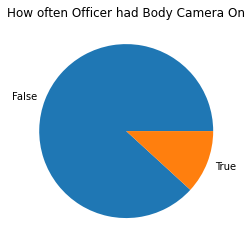

In [514]:
body_cam = df['body_camera'].value_counts()
label = df['body_camera'].value_counts().index.tolist()

plt.pie(body_cam, labels = label)
plt.title('How often Officer had Body Camera On')
plt.show()

In [515]:
by_race = df['race'].value_counts()
by_race

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64

In [516]:
# Percentage shot by race
shot = {'race': ['White','Black','Hispanic','Asian', 'Native'],
        'percent shot': [by_race['White']/(len(df)),by_race['Black']/(len(df)),
                    by_race['Hispanic']/(len(df)),by_race['Asian']/(len(df)),
                    by_race['Native']/(len(df))]
        }

df_shot = pd.DataFrame(shot, columns = ['race', 'percent shot'])
df_shot

,race,percent shot
0,White,0.505822
1,Black,0.265169
2,Hispanic,0.184270
3,Asian,0.018999
4,Native,0.015935


In [517]:
# Actual population demographics from US Census
population = {'race': ['White','Black','Hispanic','Asian', 'Native'],
        'percent in population': [0.601,0.134,0.185,0.059, 0.015]
        }

df_pop = pd.DataFrame(population, columns = ['race', 'percent in population'])
df_pop

,race,percent in population
0,White,0.601
1,Black,0.134
2,Hispanic,0.185
3,Asian,0.059
4,Native,0.015


In [518]:
df_comp = df_shot.merge(df_pop)

<AxesSubplot:xlabel='flee'>

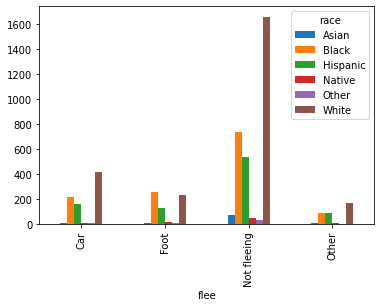

In [519]:
pd.crosstab(df['flee'],df['race']).plot.bar()

<AxesSubplot:xlabel='race'>

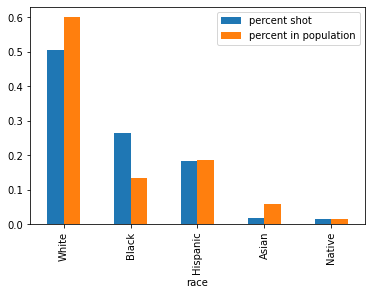

In [520]:
df_comp.plot(x="race", y=["percent shot", "percent in population"], kind="bar")

Text(0, 0.5, 'Total shot')

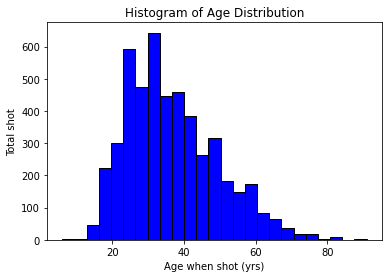

In [521]:
plt.hist(df['age'], color = 'blue', edgecolor = 'black',
         bins = 25)
plt.title('Histogram of Age Distribution')
plt.xlabel('Age when shot (yrs)')
plt.ylabel('Total shot')

In [522]:
bin_ages = ['under 18', '18-24', '25-34', '35-49', 'over 50']
cut_bins = [0, 18, 25, 35, 50, 100]
df['age_cat'] = pd.cut(df['age'], bins=cut_bins, labels=bin_ages)

Text(0.5, 1.0, 'Side-by-Side Histogram with age and race')

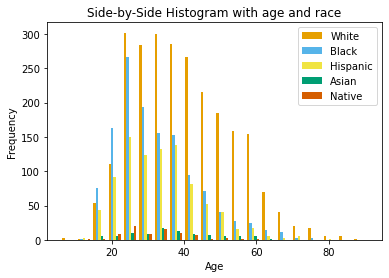

In [523]:
x1 = list(df[df['race'] == 'White']['age'])
x2 = list(df[df['race'] == 'Black']['age'])
x3 = list(df[df['race'] == 'Hispanic']['age'])
x4 = list(df[df['race'] == 'Asian']['age'])
x5 = list(df[df['race'] == 'Native']['age'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['White', 'Black', 'Hispanic',
         'Asian', 'Native']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5], bins = 20, 
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Side-by-Side Histogram with age and race')

In [524]:
age_race_group = df.groupby(['race', 'age_cat']).size()
age_race_group

race      age_cat 
Asian     under 18      6
          18-24        10
          25-34        32
          35-49        31
          over 50      14
Black     under 18     77
          18-24       339
          25-34       440
          35-49       343
          over 50      99
Hispanic  under 18     45
          18-24       178
          25-34       320
          35-49       293
          over 50      66
Native    under 18      2
          18-24        19
          25-34        34
          35-49        20
          over 50       3
Other     under 18      3
          18-24         9
          25-34        19
          35-49        13
          over 50       4
White     under 18     57
          18-24       282
          25-34       715
          35-49       867
          over 50     555
dtype: int64

In [525]:
ave_age = df.groupby('race').mean()[['age']]
ave_age

,age
race,
Asian,36.561676
Black,32.549946
Hispanic,33.683847
Native,31.732281
Other,33.064957
White,39.909488


Text(0.5, 1.0, 'Distribution of Age by Race')

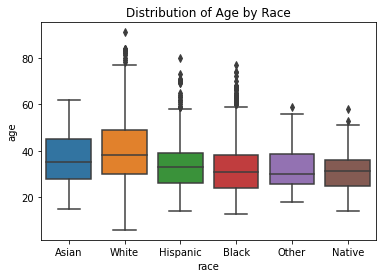

In [526]:
sns.boxplot(x="race", y="age",data=df)
plt.title('Distribution of Age by Race')

In [527]:
flee_counts = df.groupby(["flee", "race"]).size()
flee_counts

flee         race    
Car          Asian          6
             Black        218
             Hispanic     159
             Native         9
             Other         10
             White        418
Foot         Asian         11
             Black        255
             Hispanic     124
             Native        16
             Other          5
             White        231
Not fleeing  Asian         71
             Black        734
             Hispanic     534
             Native        47
             Other         30
             White       1657
Other        Asian          5
             Black         91
             Hispanic      85
             Native         6
             Other          3
             White        170
dtype: int64

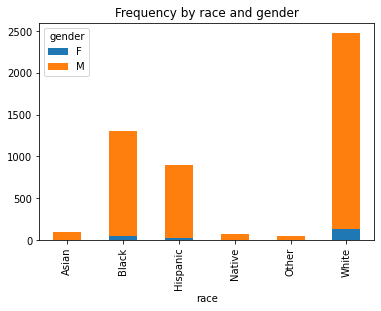

In [528]:
df.groupby(['race','gender']).size().unstack().plot(kind='bar',stacked=True)
plt.title('Frequency by race and gender');
plt.show()

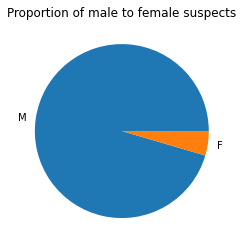

In [529]:
gender = df['gender'].value_counts()
label = df['gender'].value_counts().index.tolist()

plt.pie(gender, labels = label)
plt.title('Proportion of male to female suspects')
plt.show()

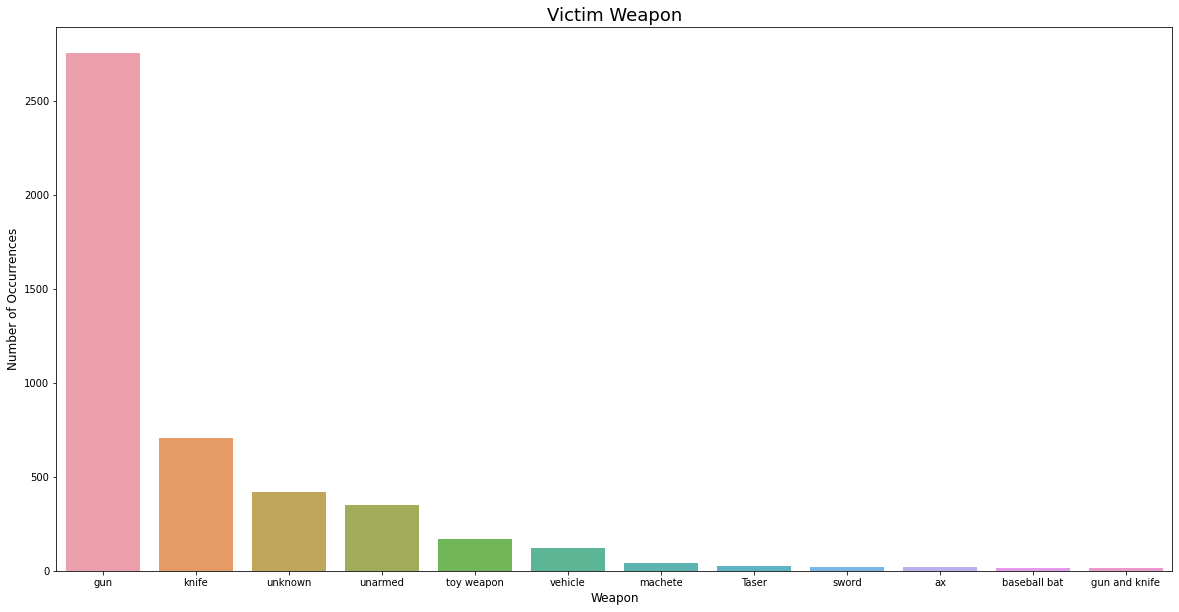

In [530]:
by_arm = df['armed'].value_counts()
weapon = by_arm[0:12,]
plt.figure(figsize=(20,10))
sns.barplot(weapon.index, weapon.values, alpha=0.9)
plt.title('Victim Weapon', fontsize=18)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Weapon', fontsize=12)
plt.show()

In [531]:
white = df[df.race=="White"]
nonwhite = df[df.race!="White"]
female = df[df.gender=="F"]
male = df[df.race!="F"]

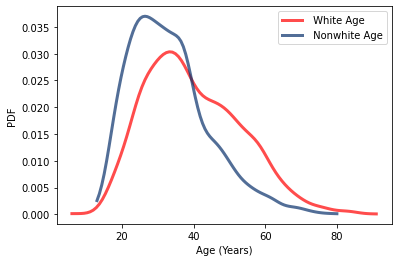

In [532]:
white_age = white.age.dropna()
pdf = thinkstats2.EstimatedPdf(white_age)
nonwhite_age = nonwhite.age.dropna()
pdf2 = thinkstats2.EstimatedPdf(nonwhite_age)
thinkplot.Pdf(pdf, label=' White Age', color = 'red')
thinkplot.Pdf(pdf2, label=' Nonwhite Age')
thinkplot.Config(xlabel='Age (Years)', ylabel='PDF')

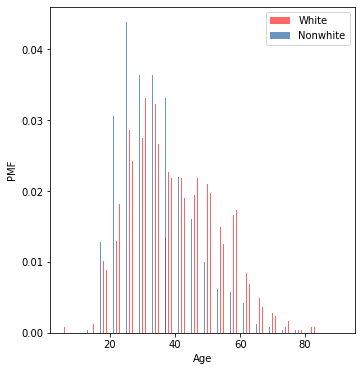

In [533]:
white_age = white['age']
nonwhite_age = nonwhite['age']
pmf_white = thinkstats2.Pmf(white_age)
pmf_nonwhite = thinkstats2.Pmf(nonwhite_age)
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf_white, align='right', color ='red', label ="White")
thinkplot.Hist(pmf_nonwhite, align='left', label ="Nonwhite")
thinkplot.Config(xlabel='Age', ylabel='PMF')

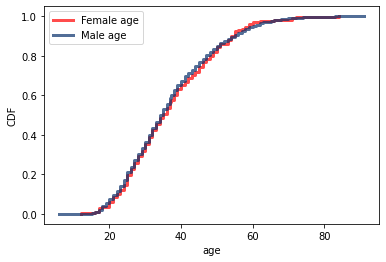

<Figure size 576x432 with 0 Axes>

In [534]:
cdf = thinkstats2.Cdf(female.age, label='Female age')
cdf2 = thinkstats2.Cdf(male.age, label='Male age')
thinkplot.Cdf(cdf, color ='red')
thinkplot.Cdf(cdf2)
thinkplot.Show(xlabel='age', ylabel='CDF')

In [535]:
import math
def CohenEffectSize(grp1, grp2):
    diff = grp1.mean() - grp2.mean()
    var1 = grp1.var()
    var2 = grp2.var()
    n1, n2 = len(grp1), len(grp2)
    pooled_var = (n1 * var1 + n2 * var2)/(n1+n2)
    d = diff/math.sqrt(pooled_var)
    return d

In [536]:
CohenEffectSize(female.age, male.age)

0.03698731265828069

In [537]:
import scipy.stats
def EvalNormalCDF(x, mu=0, sigma=1):
    return scipy.stats.norm.cdf(x, loc=mu, scale=sigma)

In [538]:
def MakeNormalPlot(age):
    mean = age.mean()
    std = age.std()
    xs = [-4, 4]
    xs, ys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(xs, ys, color='grey', label='model')

    xs, ys = thinkstats2.NormalProbability(age)
    thinkplot.Plot(xs, ys, label='age')

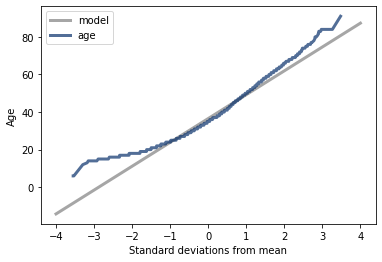

<Figure size 576x432 with 0 Axes>

In [539]:
MakeNormalPlot(df.age)
thinkplot.Show(xlabel='Standard deviations from mean', ylabel='Age')

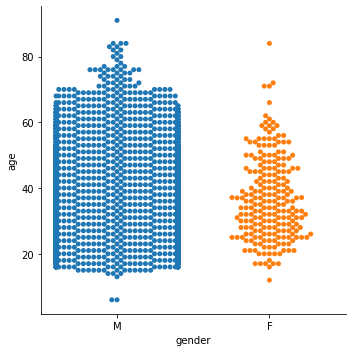

In [540]:
sns.catplot(x="gender", y="age", kind="swarm", data=df)

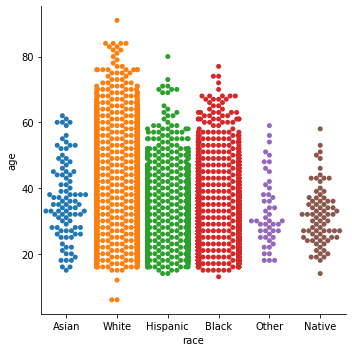

In [541]:
sns.catplot(x="race", y="age", kind="swarm", data=df)

In [542]:
cols = [5, 6, 7]
df = pd.read_csv("shootings.csv", index_col=0, usecols=cols)
df["race"] = df["race"].astype('category')
df["gender"] = df["gender"].astype('category')
df["race"] = df["race"].cat.codes
df["gender"] = df["gender"].cat.codes
df

,gender,race
age,,
53.0,1,0
47.0,1,5
23.0,1,2
32.0,1,5
39.0,1,2
...,...,...
27.0,1,1
23.0,1,1
25.0,0,5


In [545]:
import statsmodels.formula.api as smf
df['black'] = (df.race==1).astype(int)
model = smf.ols('black ~ gender', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  black   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.411
Date:                Sat, 08 Aug 2020   Prob (F-statistic):             0.0648
Time:                        21:05:09   Log-Likelihood:                -2941.1
No. Observations:                4895   AIC:                             5886.
Df Residuals:                    4893   BIC:                             5899.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2117      0.030      7.147      0.000       0.154       0.270
gender         0.0560      0.030      1.847      0.065      -0.003       0.115
==============================================================================
Omnibus:                     1204.580   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1074.763
Skew:                           1.063   Prob(JB):                    4.15e-234
Kurtosis:                       2.133   Cond. No.                         9.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [546]:
endog = pd.DataFrame(model.endog, columns=[model.endog_names])
exog = pd.DataFrame(model.exog, columns=model.exog_names)

In [547]:
actual = endog['black']
baseline = actual.mean()
baseline

0.2651685393258427

In [548]:
predict = (results.predict() >= 0.5)
true_pos = predict * actual
true_neg = (1 - predict) * (1 - actual)
sum(true_pos), sum(true_neg)

(0.0, 3597.0)

In [549]:
acc = (sum(true_pos) + sum(true_neg)) / len(actual)
acc

0.7348314606741573

In [558]:
columns = ['age', 'gender']
new = pd.DataFrame([[35, 1]], columns=columns)
y = results.predict(new)
y

0    0.267708
dtype: float64

In [557]:
# 35 year old male has 26% chance of being black, according to model